In [1]:
# Load RedMaPPer catalogue

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
import astropy.coordinates as coord
import healpy as hp

In [3]:
des = fits.open("/mnt/scratch-lustre/mlokken/y3_redmapper_cats/act_overlap_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl02_catalog.fit")
desclustrs = des[1].data
deshdr = des[1].header
des.close()

In [20]:
# How many clusters are in this catalog? ~ 300,000:
print(len(desclustrs))

deshdr

38190


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  730 / length of dimension 1                          
NAXIS2  =                38190 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   69 / number of table fields                         
TTYPE1  = 'MEM_MATCH_ID'                                                        
TFORM1  = 'J       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC     '        

In [6]:
ra = desclustrs['RA']
ra[ra>100]=ra[ra>100]-360
dec = desclustrs['DEC']
z = desclustrs['Z_LAMBDA']
z_e = desclustrs['Z_LAMBDA_E']
pzbins = desclustrs['PZBINS'] #redshifts at which we evaluate the redshift probability distribution P(z) for each cluster.
pz = desclustrs['PZ'] #the corresponding P(z) values

In [30]:
pzbins[1000], pz[1000]

(array([0.39395955, 0.3993471 , 0.4047346 , 0.41012216, 0.41550967,
        0.42089722, 0.42628476, 0.43167228, 0.43705982, 0.44244733,
        0.44783488, 0.45322242, 0.45860997, 0.46399745, 0.469385  ,
        0.47477254, 0.4801601 , 0.48554757, 0.49093512, 0.49632266,
        0.50171024], dtype=float32),
 array([1.8480758e-04, 1.6515978e-03, 1.2061212e-02, 7.1982376e-02,
        3.4999683e-01, 1.3800552e+00, 4.3779464e+00, 1.1063143e+01,
        2.2000505e+01, 3.3608089e+01, 3.9825844e+01, 3.5275604e+01,
        2.2839359e+01, 1.0593158e+01, 3.4684596e+00, 7.9379785e-01,
        1.2649752e-01, 1.4049606e-02, 1.0942429e-03, 6.6310233e-05,
        2.6630282e-06], dtype=float32))

In [38]:
max(z)

0.8315243

In [4]:
plt.plot(pzbins[24377], pz[24377])

NameError: name 'pzbins' is not defined

In [32]:
# integrate
onebin = pzbins[3000]
oneprob= pz[3000]
dist = onebin[4]-onebin[3]
print(dist)
sum = 0
for i in range(len(oneprob)):
    val = oneprob[i]
    sum+=val*dist
print(sum)

0.0047957897
1.0026785508004257


In [13]:
# integrate
onebin = pzbins[3000]
oneprob= pz[3000]
dist = onebin[4]-onebin[3]
print(dist)
sum = 0
for i in range(len(oneprob)-1,-1,-1):
    print(i)
    val = oneprob[i]
    sum+=val*dist
print(sum)

0.0047957897
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


NameError: name 'm' is not defined

In [33]:
(pzbins[3000][len(pzbins[3000])-1] - pzbins[3000][0])/len(pzbins[3000])

0.00456742871375311

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


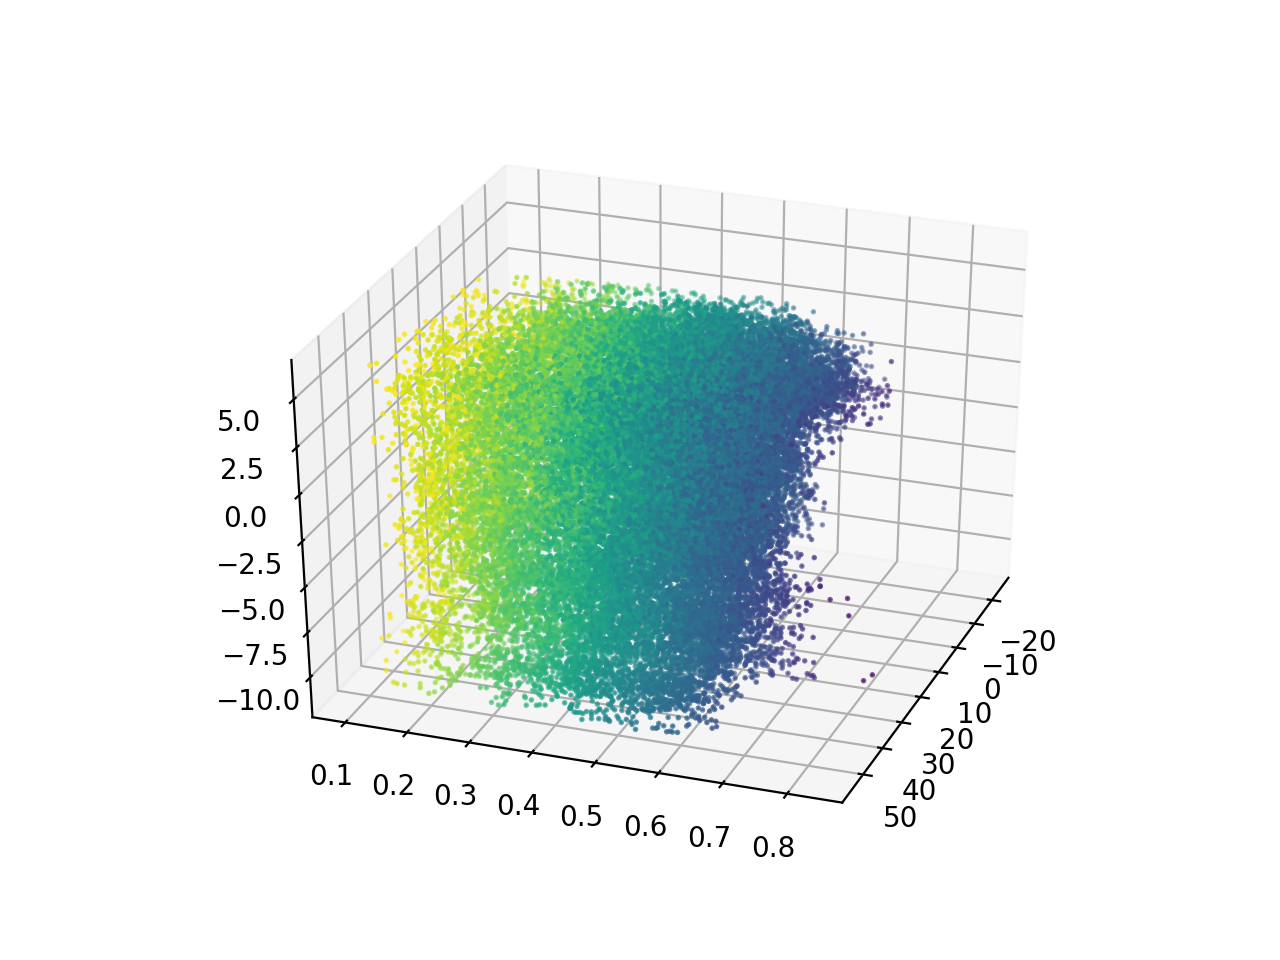

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ra, z, dec, s=1, c=-z)


In [42]:
print(z)

[0.29250583 0.37259918 0.2726794  ... 0.3591891  0.470893   0.6523629 ]


In [56]:
np.where(pzbins==np.amin(pzbins))

(array([24377]), array([0]))

In [58]:
pzbins[24377]

array([-0.04029389, -0.02536825, -0.01044261,  0.00448304,  0.01940868,
        0.03433432,  0.04925997,  0.06418561,  0.07911126,  0.0940369 ,
        0.10896254,  0.1238882 ,  0.13881382,  0.15373945,  0.16866511,
        0.18359077,  0.1985164 ,  0.21344206,  0.22836769,  0.24329332,
        0.25821897], dtype=float32)